# sklearnの確認問題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします。

In [172]:
import pandas as pd

## 前準備




### データの読み取り
scikit-learnから提供される`iris`というデータセットを読み込みます。

In [173]:
from sklearn.datasets import load_iris
iris = load_iris()

#説明変数の読み取り
data = iris.data
feature_names = iris.feature_names
df_data = pd.DataFrame(data=data, columns=feature_names)

#目的変数の読み取り
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=['target'])

### 問1. 説明変数の把握

1.1. `df_data` の先頭五行を表示してください。

In [174]:
print(df_data.head(5))


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


1.2. `df_data` の行数と列数を表示しましょう。

In [175]:
df_data.shape

(150, 4)

1.3. `df_data` の各列の `mean`, `count`, `std` などの基本特徴量を表示しましょう。


In [176]:
print(df_data.describe)

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>


1.4. `df_data` に欠損値がないかを確認しましょう。

In [177]:
print(df_data.isnull().sum())   


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


### 問2. 目的変数の把握

2.1. `df_target` のうち、ランダムに 10 行表示しましょう。

目的変数の数字はそれぞれ、

- 0 が `setosa`（ヒオウギアヤメ）
- 1 が `versicolor`（ブルーフラッグ）
- 2 が `virginica`（バージニカ）

を指しています。


In [178]:
df_target.sample(10)

,target
93,1
48,0
80,1
137,2
73,1
108,2
14,0
145,2
120,2
55,1


### 問3. データの可視化（Extra）

3.1. x 軸を petal length (cm)、y 軸を petal width (cm)にして散布図を作成しましょう。 ただし、目的変数に応じて点の色と形を変更してください。

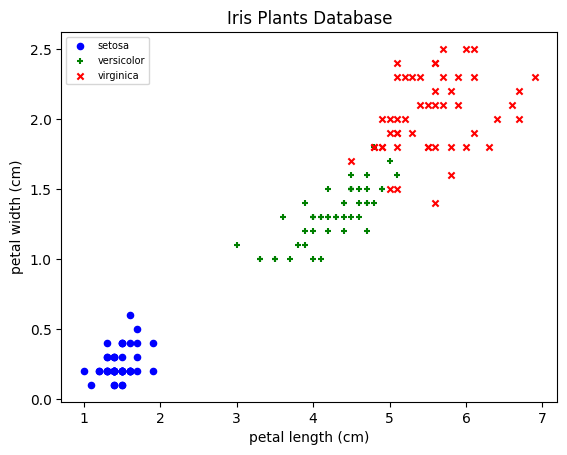

In [179]:

import matplotlib.pyplot as plt

df_target['target_name'] = df_target['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df_new = pd.concat([df_data, df_target['target_name']], axis=1)


df_setosa = df_new[df_new["target_name"] == "setosa"]
df_versicolor = df_new[df_new["target_name"] == "versicolor"]
df_virginica = df_new[df_new["target_name"] == "virginica"]

plt.scatter(df_setosa["petal length (cm)"],df_setosa["petal width (cm)"],label="setosa", color="blue" ,s=20, marker = "o")
plt.scatter(df_versicolor["petal length (cm)"],df_versicolor["petal width (cm)"],label="versicolor", color="green" ,s=20, marker = "+")
plt.scatter(df_virginica["petal length (cm)"],df_virginica["petal width (cm)"],label="virginica", color="red" ,s=20, marker = "x")

plt.title("Iris Plants Database")
plt.ylabel("petal width (cm)")
plt.xlabel("petal length (cm)")


plt.legend(fontsize=7) 


## 機械学習


### 問4. データの分割

4.1. iris データを 4:1 に分割して、80% を学習データとして 20% をテストデータとしてください。

ただし、分割した後の変数名は以下の通りにしてください。

| 変数名  |      内容      |
| :-----: | :------------: |
| x_train | 学習用の説明変数 |
| x_test | テスト用の説明変数 |
| y_train | 学習用の目的変数 |
| y_test | テスト用の目的変数 |

学習データでモデルの学習を行い、テストデータでモデルの評価を行います。


In [180]:
from sklearn.model_selection import train_test_split
df_target = pd.DataFrame(data=target, columns=['target'])

x = df_data
y = df_target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

4.2. 本当に4:1に分割できているか確認しましょう。

In [181]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


### 問5. 学習

5.1. RandamForest の学習モデルのインスタンスを生成しましょう。

In [182]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 0)

print("x_train type:", type(x_train))

print("t_train type:", type(y_train))


x_train type: <class 'pandas.core.frame.DataFrame'>
t_train type: <class 'pandas.core.frame.DataFrame'>


5.2. `x_train` と `y_train` を用いて、モデルを学習させましょう。

In [183]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

### 問6. 推論


6.1. 学習したモデルに `x_test` を入力して予測をしましょう。

In [184]:
predict = model.predict(x_test)

6.2. 予測結果と `y_test` に対して、`accuracy` を計算することでモデルを評価しましょう。

In [185]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict)

print(accuracy)


1.0


実は、iris データセットはかなり簡単な分布をしているので、正解率はほぼ 100% になったと思います。